In [2]:
import numpy as np
import matplotlib.pyplot as plt

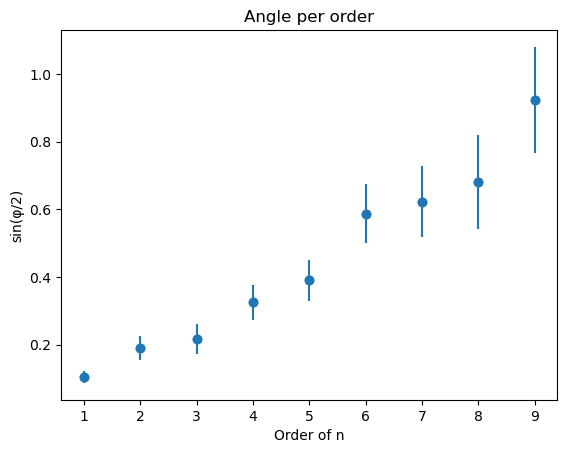

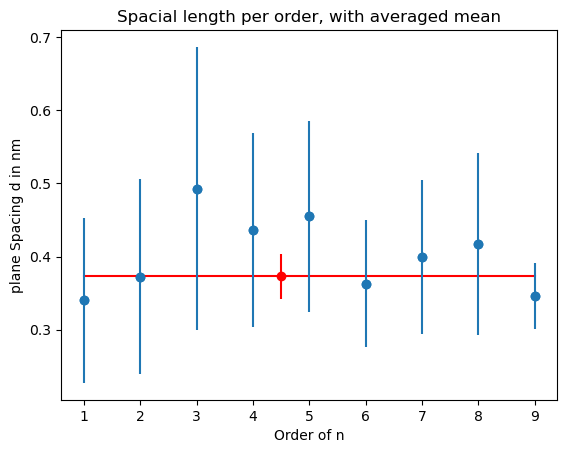

The plane spacing d = (0.373+/-0.031)nm


In [4]:
#Ex. 1
n_array = np.linspace(1,9,9)
phi_array = np.array([12,22,25,38,46,72,77,86,135],dtype = float) #in deg
error_array = np.array([2,4,5,6,7,10,12,16,18],dtype = float)
cos_array = np.cos((phi_array/2)*((np.pi/180))) #this is used later in the error propagation
for i in range(len(phi_array)):
    phi_array[i] = np.sin((phi_array[i]/2)*(np.pi/180)) #in rad and halved
    error_array[i] = np.sin((error_array[i]/2)*(np.pi/180))
plt.scatter(n_array,phi_array)
plt.errorbar(n_array,phi_array,yerr = error_array, fmt = "o") #a) and b)
plt.xlabel("Order of n")
plt.ylabel("sin(\u03C6/2)")
plt.title("Angle per order")
plt.show()

d_array = np.zeros(len(n_array))
for i in range(len(n_array)):
    d_array[i] = n_array[i]*0.0711/(2*phi_array[i]) #in nm
#plt.scatter(n_array,d_array) #a) and b)

#do error propagation:
d_error = np.zeros(len(n_array))
for i in range(len(n_array)):
    d_error[i] = 0.0711*n_array[i]*(cos_array[i]/(phi_array[i]**2))*error_array[i]
#plt.scatter(n_array,d_array)
#plt.errorbar(n_array,d_array,yerr = d_error, fmt = "o")
#plt.xlabel("Order of n")
#plt.ylabel("plane Spacing d in nm")
#plt.title("Spacial length per order")
#plt.show()

#lets calculate the weighted mean!
d_sum = 0
e_sum = 0
for i in range(len(n_array)):
    d_sum += d_array[i]/(d_error[i]**2)
    e_sum += 1/(d_error[i]**2)
d_mean = np.round(d_sum/e_sum, decimals = 3)
d_mean_error = 1/e_sum
d_mean_error = np.round(d_mean_error**0.5, decimals = 3)

plt.plot(n_array,d_mean*np.ones(len(n_array)), color = "r")
plt.errorbar([4.5],[d_mean], yerr = [d_mean_error], color = "r", fmt = "o")
plt.scatter(n_array,d_array)
plt.errorbar(n_array,d_array,yerr = d_error, fmt = "o")
plt.xlabel("Order of n")
plt.ylabel("plane Spacing d in nm")
plt.title("Spacial length per order, with averaged mean")
plt.show()

print(f"The plane spacing d = ({d_mean}+/-{d_mean_error})nm")

Ex. 2
a)
$$CoV = 
\left(\begin{array}{l} 
\sigma^2_u+S^2 & \sigma_u\sigma_R\\
\sigma_u\sigma_R & \sigma_R^2
\end{array}\right)
$$
Since 
$$
u_u = \sigma_u+S =0.03V
$$

We get for the Covariance Matrix:

$$CoV = 
\left(\begin{array}{l} 
0.05V^2 & 20V\Omega\\
20V\Omega & 40000\Omega^2
\end{array}\right)
$$

b)
$$I = \frac{U}{R}= 1.2mA$$
For the uncertainty, we have to do error propagation:
$$u_i = \sqrt{(\frac{\partial I}{\partial U}u_U)^2 + (\frac{\partial I}{\partial R}u_R)^2}$$
$$ = \sqrt{(\frac{u_u}{R})^2+(\frac{U}{R^2}u_R)^2} $$
$$ = \sqrt{(\frac{0.3V}{10k\Omega})^2+(\frac{12V}{(10k\Omega)^2}200\Omega)^2} = 0.04mA$$
So we get for I:
$$I = (1.2\pm0.04)mA$$

c)-